In [4]:
import datetime as dt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor

In [5]:
forest = pd.read_csv('fire_archive.csv')

forest.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0


In [6]:
forest.shape
# Here we can see that we have 36011 rows and 15 columns in our dataset, obviously we have to do lot of data cleaning but first let's explore this dataset more

(36011, 15)

In [7]:
forest.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [8]:
forest.isnull().sum()
# Fortunately we don't have any null values in this dataset

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [9]:
forest.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,3.601100e+04,36011.000000,36011.000000,36011.000000
mean,-19.100962,138.931446,328.750696,1.620905,1.215281,600.025798,67.551387,6.300000e+00,301.339138,51.132176,0.019439
std,7.265777,9.261400,18.992808,0.813764,0.247852,548.369111,23.179946,1.776382e-15,9.724462,92.280112,0.198326
min,-42.762800,114.104300,300.000000,1.000000,1.000000,0.000000,0.000000,6.300000e+00,267.000000,0.000000,0.000000
25%,-26.370250,131.072250,316.500000,1.100000,1.000000,205.000000,52.000000,6.300000e+00,293.600000,13.800000,0.000000
50%,-15.706500,136.738500,326.400000,1.300000,1.100000,424.000000,70.000000,6.300000e+00,302.400000,25.800000,0.000000
75%,-13.343600,147.477500,336.700000,1.900000,1.300000,600.000000,86.000000,6.300000e+00,308.600000,52.800000,0.000000
max,-10.072600,153.490400,504.400000,4.800000,2.000000,2359.000000,100.000000,6.300000e+00,400.100000,3679.500000,3.000000


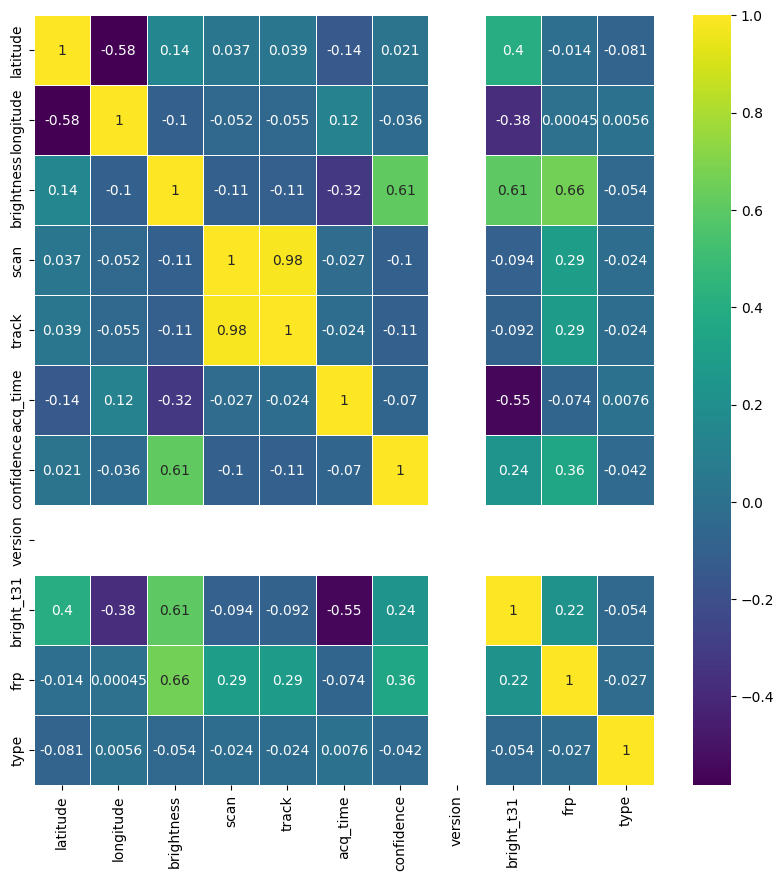

In [10]:
numeric_data = forest.select_dtypes(include=['number'])

# Create the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='viridis', linewidths=0.5)
plt.show()

In [11]:
forest = forest.drop(['track'], axis = 1)

In [12]:
# By the way from the the dataset we are not finding if the forest fire happens or not, we are trying to find the confidence of the forest
# fire happening. They may seem to be the same thing but there is a very small difference between them, try to find that :)

In [13]:
# Finding categorical data
print("The scan column")
print(forest['scan'].value_counts())
print()
print("The aqc_time column")
print(forest['acq_time'].value_counts())
print()
print("The satellite column")
print(forest['satellite'].value_counts())
print()
print("The instrument column")
print(forest['instrument'].value_counts())
print()
print("The version column")
print(forest['version'].value_counts())
print()
print("The daynight column")
print(forest['daynight'].value_counts())
print()

The scan column
scan
1.0    8284
1.1    6000
1.2    3021
1.3    2412
1.4    1848
1.5    1610
1.6    1451
1.7    1281
1.8    1041
1.9     847
2.0     707
2.2     691
2.1     649
2.3     608
2.5     468
2.4     433
2.8     422
3.0     402
2.7     366
2.9     361
2.6     347
3.1     259
3.2     244
3.6     219
3.4     203
3.3     203
3.8     189
3.9     156
4.7     149
4.3     137
3.5     134
3.7     134
4.1     120
4.6     118
4.5     116
4.2     108
4.0     103
4.4     100
4.8      70
Name: count, dtype: int64

The aqc_time column
acq_time
506     851
454     631
122     612
423     574
448     563
       ... 
635       1
2322      1
156       1
1631      1
1601      1
Name: count, Length: 662, dtype: int64

The satellite column
satellite
Aqua     20541
Terra    15470
Name: count, dtype: int64

The instrument column
instrument
MODIS    36011
Name: count, dtype: int64

The version column
version
6.3    36011
Name: count, dtype: int64

The daynight column
daynight
D    28203
N     7808
Na

In [14]:
# From the above data we can see that some columns have just one value reccurring in them, meaning they are not valuable to us
# So we will drop them altogether.
# Thus only satellite and daynight column are the only categorical type.

In [15]:
# But we can even use the scan column to restructure it into a categorical data type column. Which we will be doing in just a while.

In [16]:
forest = forest.drop(['instrument', 'version'], axis = 1)

forest.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,Terra,48,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,Terra,71,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,Terra,42,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,Terra,33,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,Terra,36,298.8,27.6,D,0


In [17]:
daynight_map = {"D": 1, "N": 0}
satellite_map = {"Terra": 1, "Aqua": 0}

forest['daynight'] = forest['daynight'].map(daynight_map)
forest['satellite'] = forest['satellite'].map(satellite_map)

forest.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,0
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1,71,297.3,11.3,1,0
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,1,42,298.7,23.1,1,0
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,0
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,1,36,298.8,27.6,1,0


In [18]:
# Looking at another columns type
forest['type'].value_counts()

type
0    35666
2      335
3       10
Name: count, dtype: int64

In [19]:
types = pd.get_dummies(forest['type'])
forest = pd.concat([forest, types], axis=1)

forest = forest.drop(['type'], axis = 1)
forest.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,0,2,3
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,True,False,False
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1,71,297.3,11.3,1,True,False,False
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,1,42,298.7,23.1,1,True,False,False
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,True,False,False
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,1,36,298.8,27.6,1,True,False,False


In [20]:
# Renaming columns for better understanding

forest = forest.rename(columns={0: 'type_0', 2: 'type_2', 3: 'type_3'})

In [21]:
# Now I mentioned we will be converting scan column to categorical type, we will be doing this using binning method.
# Range for this columns was 1 to 4.8

bins = [0, 1, 2, 3, 4, 5]
labels = [1,2,3,4,5]
forest['scan_binned'] = pd.cut(forest['scan'], bins=bins, labels=labels)

forest.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_0,type_2,type_3,scan_binned
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,True,False,False,1
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1,71,297.3,11.3,1,True,False,False,1
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,1,42,298.7,23.1,1,True,False,False,4
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,True,False,False,2
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,1,36,298.8,27.6,1,True,False,False,4


In [22]:
# Converting the datatype to datetype from string or numpy.

forest['acq_date'] = pd.to_datetime(forest['acq_date'])

In [23]:
# Now we will be dropping scan column and handle date type data - we can extract useful information from these datatypes 
# just like we do with categorical data.

forest = forest.drop(['scan'], axis = 1)

In [24]:
forest['year'] = forest['acq_date'].dt.year

forest.head()

,latitude,longitude,brightness,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_0,type_2,type_3,scan_binned,year
0,-11.8070,142.0583,313.0,2019-08-01,56,1,48,297.3,6.6,1,True,False,False,1,2019
1,-11.7924,142.0850,319.3,2019-08-01,56,1,71,297.3,11.3,1,True,False,False,1,2019
2,-12.8398,132.8744,311.6,2019-08-01,57,1,42,298.7,23.1,1,True,False,False,4,2019
3,-14.4306,143.3035,310.1,2019-08-01,57,1,33,296.1,6.5,1,True,False,False,2,2019
4,-12.4953,131.4897,310.3,2019-08-01,57,1,36,298.8,27.6,1,True,False,False,4,2019


In [25]:
forest['month'] = forest['acq_date'].dt.month
forest['day'] = forest['acq_date'].dt.day

In [26]:
forest.shape

(36011, 17)

In [27]:
# Separating our target varibale:

# y = forest['confidence']
# fin = forest.drop(['confidence', 'acq_date', 'acq_time', 'bright_t31', 'type_0'], axis = 1)

X = forest[['brightness', 'bright_t31', 'frp', 'latitude', 'longitude']]
y = forest['confidence']


Text(0.5, 1.0, 'Feature Correlation Heatmap')

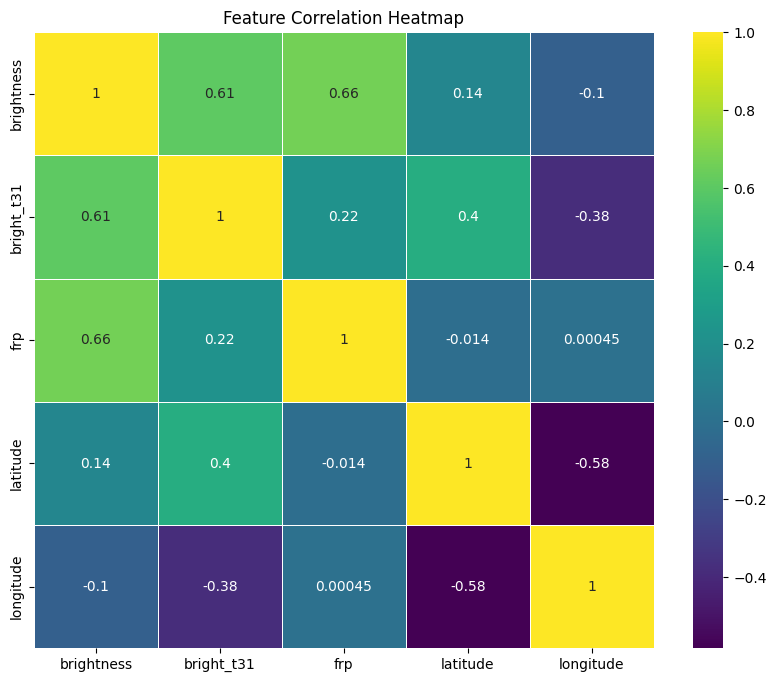

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='viridis', linewidths=0.5)
plt.title("Feature Correlation Heatmap")


In [31]:
X.head()

,brightness,bright_t31,frp,latitude,longitude
0,313.0,297.3,6.6,-11.8070,142.0583
1,319.3,297.3,11.3,-11.7924,142.0850
2,311.6,298.7,23.1,-12.8398,132.8744
3,310.1,296.1,6.5,-14.4306,143.3035
4,310.3,298.8,27.6,-12.4953,131.4897


In [32]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [33]:
random_model = RandomForestRegressor(n_estimators=300, random_state = 42, n_jobs = -1)

In [34]:
#Fit
random_model.fit(Xtrain, ytrain)

y_pred = random_model.predict(Xtest)

#Checking the accuracy
random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

94.73 %


In [35]:
#Checking the accuracy
random_model_accuracy1 = round(random_model.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

60.13 %


In [36]:
from sklearn.metrics import mean_squared_error, r2_score
print("R²:", r2_score(ytest, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(ytest, y_pred)))

R²: 0.6012787709234266
RMSE: 14.824568279441355


In [37]:
# Save the trained model as a pickle string.
import pickle 

saved_model = pickle.dump(random_model, open('ForestModelOld.pickle','wb'))

In [38]:
# The accuracy is not so great, plus the model is overfitting
# So we use RandomCV

In [39]:
random_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 300,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [40]:
"""
n_estimators = number of trees in the foreset
max_features = max number of features considered for splitting a node
max_depth = max number of levels in each decision tree
min_samples_split = min number of data points placed in a node before the node is split
min_samples_leaf = min number of data points allowed in a leaf node
bootstrap = method for sampling data points (with or without replacement)
"""

from sklearn.model_selection import RandomizedSearchCV

In [41]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 500, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(15, 35, num = 7)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                }
print(random_grid)

{'n_estimators': [300, 310, 321, 331, 342, 352, 363, 373, 384, 394, 405, 415, 426, 436, 447, 457, 468, 478, 489, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [15, 18, 21, 25, 28, 31, 35, None], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 2, 4]}


<Axes: xlabel='confidence', ylabel='Count'>

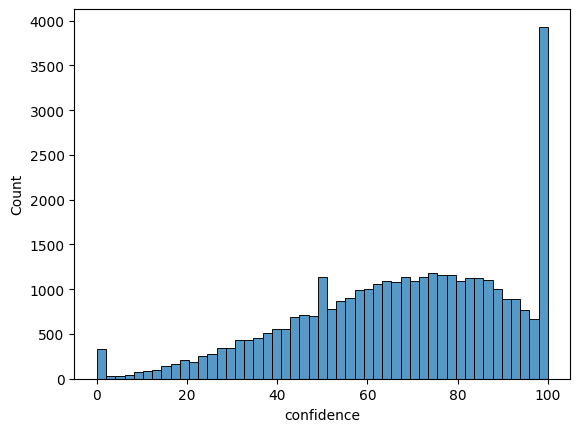

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.histplot(forest['confidence'])


<Axes: xlabel='confidence', ylabel='latitude'>

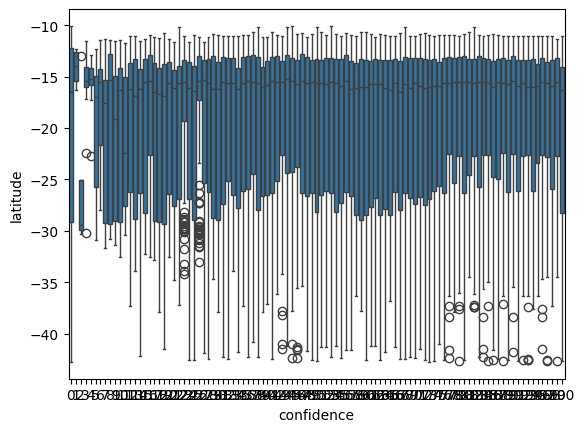

In [43]:
sns.boxplot(x='confidence', y='latitude', data=forest)

In [44]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

# n_iter, which controls the number of different combinations to try, and cv which is the number of folds to use for cross validation
rf_random = RandomizedSearchCV(estimator = random_model, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(Xtrain, ytrain)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=415; total time=   0.0s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=415; total time=   0.0s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=415; total time=   0.0s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time=   0.0s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time=   0.0s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time=   0.0s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=478; total time=   2.5s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=47

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
84 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
84 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\U

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_estimators=300, n_jobs=-1,
                                                   random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [15, 18, 21, 25, 28, 31,
                                                      35, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [300, 310, 321, 331,
                                                         342, 352, 363, 373,
                                                         384, 394, 405, 415,
                                                         426, 436, 447, 457,
                                                         468, 478, 489, 500]},
                   random_state=42, verbose=2)

In [45]:
rf_random.best_params_

{'n_estimators': 478,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 35}

In [46]:
random_new = RandomForestRegressor(n_estimators = 394, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt',
                                      max_depth = 25, bootstrap = True)

In [47]:
#Fit
random_new.fit(Xtrain, ytrain)

y_pred1 = random_new.predict(Xtest)

#Checking the accuracy
random_model_accuracy1 = round(random_new.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy1, 2), '%')

94.48 %


In [48]:
#Checking the accuracy
random_model_accuracy2 = round(random_new.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy2, 2), '%')

61.46 %


In [49]:
from sklearn.metrics import mean_squared_error, r2_score
print("R²:", r2_score(ytest, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(ytest, y_pred)))

R²: 0.6012787709234266
RMSE: 14.824568279441355


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#from sklearn.svm import SVR
#from sklearn.preprocessing import StandardScaler

# Scale data for SVR
# scaler_X = StandardScaler()
# scaler_y = StandardScaler()

# Xtrain_scaled = scaler_X.fit_transform(Xtrain)
# Xtest_scaled = scaler_X.transform(Xtest)
# ytrain_scaled = scaler_y.fit_transform(ytrain.values.reshape(-1, 1)).ravel()
# ytest_scaled = scaler_y.transform(ytest.values.reshape(-1, 1)).ravel()

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    #"SVR (RBF Kernel)": SVR(kernel='rbf')
}

# Fit models and store results
results = {}

for name, model in models.items():
    if name.startswith("SVR"):
        model.fit(Xtrain_scaled, ytrain_scaled)
        score = model.score(Xtest_scaled, ytest_scaled)
    else:
        model.fit(Xtrain, ytrain)
        score = model.score(Xtest, ytest)
    results[name] = round(score * 100, 2)


In [51]:
print("Model Comparison (R² Accuracy %):")
for model_name, acc in results.items():
    print(f"{model_name}: {acc}%")


Model Comparison (R² Accuracy %):
Linear Regression: 42.11%
Decision Tree: 24.55%
Random Forest: 60.03%


C:\Users\Admin\AppData\Local\Temp\ipykernel_2324\1657156235.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies, y=model_names, palette="viridis")


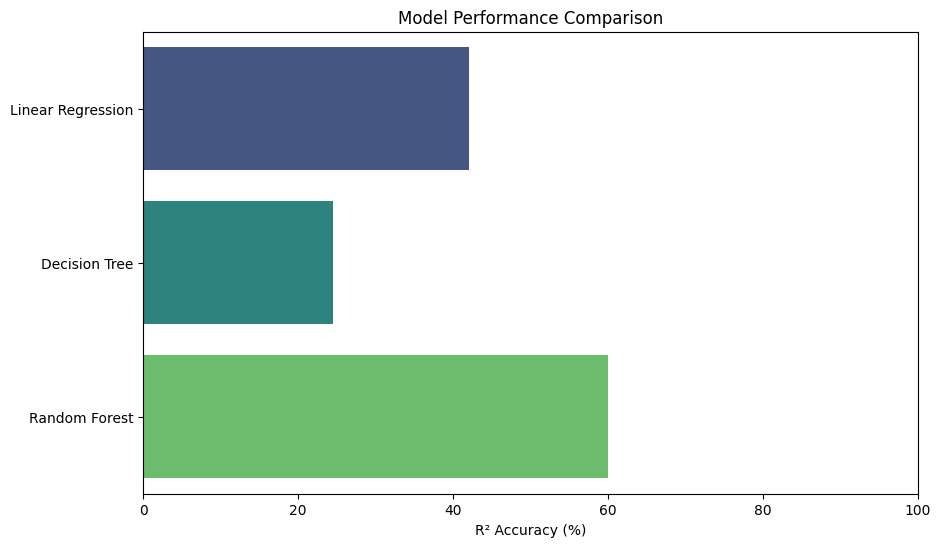

In [52]:
import matplotlib.pyplot as plt

model_names = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=accuracies, y=model_names, palette="viridis")
plt.xlabel("R² Accuracy (%)")
plt.title("Model Performance Comparison")
plt.xlim(0, 100)
plt.show()


In [53]:
import pickle
pickle.dump(model, open("forest_fire_model.pkl", "wb"))


In [54]:
# Save the trained model as a pickle string.
saved_model = pickle.dump(random_new, open('ForestModel.pickle','wb'))

In [55]:
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Generate some dummy data
X, y = make_regression(n_samples=100, n_features=1, noise=10)

# Train the model
reg = LinearRegression()
reg.fit(X, y)

# Save the trained model to a .pkl file
with open('model.pkl', 'wb') as file:
    pickle.dump(reg, file)

print("Model saved as model.pkl")



Model saved as model.pkl


In [57]:
# Hence I installed bz2file, which is used to compress data. This is a life saving package for those who have low spaces on
# their disk but want to store or use large datasets. Now the pickled file was over 700 mb in size which when used bz2
# compressed in into a file of size 93 mb.

In [58]:
import bz2

compressionLevel = 9
source_file = 'ForestModel.pickle' # this file can be in a different format, like .csv or others...
destination_file = 'ForestModel.bz2'

with open(source_file, 'rb') as data:
    tarbz2contents = bz2.compress(data.read(), compressionLevel)
    
fh = open(destination_file, "wb")
fh.write(tarbz2contents)
fh.close()